In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing data
data=pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [ ]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
# implementaion of UCB algorithm
import math
N=10000
d=10
ad_selection=[]
num_selecton=[0]*d
sum_of_rewards=[0]*d
tot_reward=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range (0,d):
    if num_selecton[i]>0:
      avg_reward=sum_of_rewards[i]/num_selecton[i]
      delta=math.sqrt((3/2)*math.log(n+1)/num_selecton[i])
      upper_bound=avg_reward+delta
    else:upper_bound=1e400
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=i
    ad_selection.append(ad)
    num_selecton[ad]+=1
    sum_of_rewards[ad]+=data.values[n,ad]
    tot_reward+=data.values[n,ad]

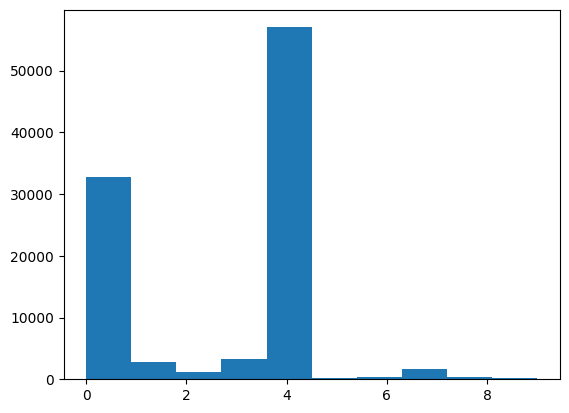

In [ ]:
plt.hist(ad_selection)
plt.show()

In [ ]:
#implementation of thompson sampling algo
import random
N=10000
d=10
ad_selection=[]
num_reward_1=[0]*d
num_reward_0=[0]*d
tot_reward=0
for n in range(0,N):
  ad=0
  max_random=0
  for i in range (0,d):
    theta=random.betavariate(num_reward_1[i]+1,num_reward_0[i]+1)
    if theta>max_random:
      max_random=theta
      ad=i
    ad_selection.append(ad)
    reward=data.values[n,ad]
    if reward==1:
      num_reward_1[ad]+=1
    else:
      num_reward_0[ad]+=1
    tot_reward+=reward

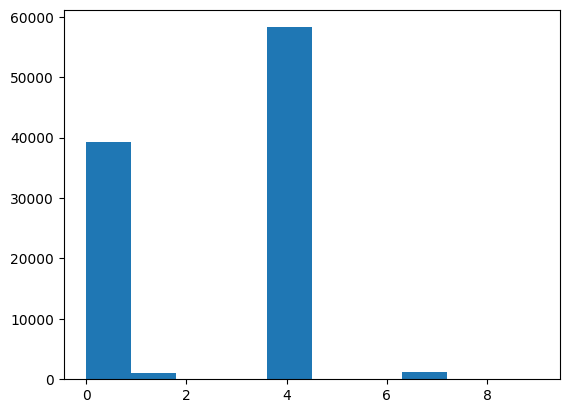

In [ ]:
plt.hist(ad_selection
         )
plt.show()